# FASTA files EDA:

## Takeaways:
1. The train sequences are significantly longer than the test sequences.
2. There is no significant difference in the amino acid compositions between the train and test sequences

## Next steps: 
1. Explore GO Terms and Taxonomy data
2. Analyze embeddings 
3. Start modeling strategy

## What is a FASTA file?

A FASTA file is a simple and commonly used file format in bioinformatics for storing biological sequence data, such as DNA or protein sequences. It's like a text document that organizes genetic information in a specific way.

Imagine you have a long, complex code that represents a sequence of DNA or protein molecules. It's like a secret message that only scientists can understand. The FASTA file provides a standardized way to write down and share  a sequence of residues with other researchers.

In a FASTA file, each sequence starts with a unique identifier, which is like a name or label for that particular sequence. It helps scientists keep track of different sequences they are working with. After the identifier, you have the actual genetic code represented by letters: A, C, G, and T for DNA sequences, or letters representing different amino acids for protein sequences.

To make it more readable, the code is often split into lines of a certain length, called line wrapping. This helps scientists visually process the information and ensures that the file doesn't become too wide or difficult to work with.

So, in simpler terms, a FASTA file is like a special document that stores genetic information. It's a way for scientists to share and organize sequences of DNA or proteins, making it easier for them to study and understand the building blocks of life.

We'll use Biopython.SeqIO to work with the FASTA files.

In [7]:
# we will use bio python to read the sequences
from Bio import SeqIO
# numpy to work with arrays
import numpy as np
# plotly to plot the graphs
import plotly.graph_objects as go
# Counter to count stuff
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Think of Bio.SeqIO as a toolbox that provides various tools to handle biological sequences, such as DNA, RNA, or protein sequences. It helps you read, write, and manipulate these sequences in different file formats.

Imagine you have a bookshelf filled with books, each representing a different biological sequence. The Bio.SeqIO toolbox allows you to pick up these books, read the sequences written inside, and perform different operations on them.

For example, we can use Bio.SeqIO to:

- Read sequences from files in formats like FASTA or GenBank.
- Write sequences to files in different formats.
- Extract specific information from sequences, like their length or identification.
- Manipulate sequences by combining, splitting, or altering them.
- Perform calculations or analyses on sequences, such as sequence alignment or translation.

In [8]:
# path to the train and test fasta files
train_fasta = '/kaggle/input/cafa-5-protein-function-prediction/Train/train_sequences.fasta'
test_fasta = '/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta'

In [12]:
# read train and test fasta files
train_sequences = SeqIO.parse(train_fasta, 'fasta')
test_sequences = SeqIO.parse(test_fasta, 'fasta')

**SeqIO.parse(train_fasta, 'fasta')** reads the FASTA file specified by the variable train_fasta and returns an iterator that can be used to iterate over the sequences in the file.

In [6]:
help(SeqIO.parse)

Help on function parse in module Bio.SeqIO:

parse(handle, format, alphabet=None)
    Turn a sequence file into an iterator returning SeqRecords.
    
    Arguments:
     - handle   - handle to the file, or the filename as a string
       (note older versions of Biopython only took a handle).
     - format   - lower case string describing the file format.
     - alphabet - no longer used, should be None.
    
    Typical usage, opening a file to read in, and looping over the record(s):
    
    >>> from Bio import SeqIO
    >>> filename = "Fasta/sweetpea.nu"
    >>> for record in SeqIO.parse(filename, "fasta"):
    ...    print("ID %s" % record.id)
    ...    print("Sequence length %i" % len(record))
    ID gi|3176602|gb|U78617.1|LOU78617
    Sequence length 309
    
    For lazy-loading file formats such as twobit, for which the file contents
    is read on demand only, ensure that the file remains open while extracting
    sequence data.
    
    If you have a string 'data' containin

We use the **SeqIO.parse()** function to read in the FASTA file.

Here's what the different parts of the above explanation mean:

- parse(handle, format, alphabet=None): This is the function signature that tells us how to use the SeqIO.parse() function. It takes three arguments:

    1. **handle**: It refers to the file or filename that we want to read. It can be a file handle or a string specifying the filename.
    2. **format**: It specifies the format of the file we're reading, such as "fasta" for FASTA format.
    3. **alphabet**: This argument is no longer used, so we ignore it by setting it to None.
- The explanation shows an example of how to use SeqIO.parse() to read a FASTA file and loop over the sequence records.
    1. It imports **SeqIO** from Biopython and specifies the filename and format.
    2. By using a for loop with **SeqIO.parse()**, it iterates over each record in the file.
    3. Inside the loop, it demonstrates printing the ID and the length of each sequence.
- It also provides an example of how to use **SeqIO.parse()** with a string of sequence data instead of a file.
    1. It shows how to convert the string data into a file-like handle using **StringIO**.
    2. The example then demonstrates parsing the data and printing the ID and sequence of each record.

In [7]:
# take a look at the first sequence
print('First sequence in train fasta file:')
print(next(train_sequences))

First sequence in train fasta file:
ID: P20536
Name: P20536
Description: P20536 sp|P20536|UNG_VACCC Uracil-DNA glycosylase OS=Vaccinia virus (strain Copenhagen) OX=10249 GN=UNG PE=1 SV=1
Number of features: 0
Seq('MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLK...FIY')


### What is going on in this output?

- The output begins with "ID: P20536", which represents the unique identifier of the sequence.
- The line "Name: P20536" suggests that "P20536" might be the name associated with the sequence.
- The "Description" field provides additional details about the sequence, including its source (Vaccinia virus), strain (Copenhagen), organism, and other information.
    - OX is the taxon ID
    - GN is the gene name
    - PE is the protein existance level. In this case, "1" indicates that experimental evidence exists for the protein encoded by the sequence (Protein existence levels are used to categorize the reliability and confidence of protein predictions).
    - SV denotes the sequence version. In this casem "1" indicates this is the first version of the sequence
- "Number of features: 0" indicates that there are no additional features or annotations associated with this particular sequence.
- Finally, "Seq('MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIPDKFFIQLK...FIY')" represents the actual sequence data. The sequence is displayed using the "Seq()" object, with the specific sequence letters shown as a string.

### Lets mess around with these data some more:

In [8]:
# retrieve the next sequence record from the train_sequences iterator
record = next(train_sequences)
# Get all attributes of the record
record_attributes = record.__dict__

# Print all attributes and their values
for attribute, value in record_attributes.items():
    print(attribute, ":", value)
    print(type(attribute))

_seq : MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKLLDGLVPDQQQLCKRNLELMHSIVRAARLTKSACTSSFSDMRWNWSSIESAPHFTPDLAKGTREAAFVVSLAAAVVSHAIARACASGDLPSCSCAAMPSEQAAPDFRWGGCGDNLRYYGLQMGSAFSDAPMRNRRSGPQDFRLMQLHNNAVGRQVLMDSLEMKCKCHGVSGSCSVKTCWKGLQDISTISADLKSKYLSATKVIPRQIGTRRQLVPREMEVRPVGENELVYLVSSPDYCTQNAKQGSLGTTDRQCNKTASGSESCGLMCCGRGYNAYTEVLVERCQCKYHWCCYVSCKTCKRTVERYVSK
<class 'str'>
id : O73864
<class 'str'>
name : O73864
<class 'str'>
description : O73864 sp|O73864|WNT11_DANRE Protein Wnt-11 OS=Danio rerio OX=7955 GN=wnt11 PE=2 SV=1
<class 'str'>
dbxrefs : []
<class 'str'>
annotations : {}
<class 'str'>
_per_letter_annotations : {}
<class 'str'>
features : []
<class 'str'>


Let's examine the output:

- _seq represents the sequence itself, with the attribute name _seq and the sequence string as its value.
- id represents the ID attribute of the sequence record, with the attribute name id and the ID value.
- name represents the name attribute of the sequence record, with the attribute name name and the name value. In this case, the ID and name values are the same.
- description represents the description attribute of the sequence record, with the attribute name description and the description value containing additional information about the sequence. It includes details like the ID, species, gene name, and more.
- dbxrefs represents the dbxrefs attribute of the sequence record, which refers to any database cross-references associated with the sequence. In this case, the attribute value is an empty list [], indicating no cross-references are present.
- annotations represents the annotations attribute of the sequence record, which contains any additional annotations or metadata associated with the sequence. In this case, the attribute value is an empty dictionary {}, indicating no annotations are present.
- _per_letter_annotations line represents the _per_letter_annotations attribute of the sequence record, which allows annotations to be associated with each letter of the sequence individually. In this case, the attribute value is an empty dictionary {}, indicating no per-letter annotations are present.
- features represents the features attribute of the sequence record, which can store any features or regions of interest present in the sequence. In this case, the attribute value is an empty list [], indicating no features are present.

In [9]:
sequence_count = sum(1 for _ in train_sequences)
train_sequences = SeqIO.parse(train_fasta, 'fasta')
sequence_count

142244

In [10]:
# put ids and sequences in separate numpy arrays
train_ids = np.array([seq.id for seq in SeqIO.parse(train_fasta, 'fasta')], dtype=object)
train_sequences = np.array([seq.seq for seq in SeqIO.parse(train_fasta, 'fasta')], dtype=object)
test_ids = np.array([seq.id for seq in SeqIO.parse(test_fasta, 'fasta')], dtype=object)
test_sequences = np.array([seq.seq for seq in SeqIO.parse(test_fasta, 'fasta')], dtype=object)

# EDA:
## Basic Statistics

### Number of sequences

In [11]:
# basic info: how many ids and sequences are there in train and test fasta files
# how many unique ids and sequences are there in train and test fasta files
print('Train fasta file:')
print('Number of ids: ', len(train_ids))
print('Number of sequences: ', len(train_sequences))
print('Number of unique ids: ', len(np.unique(train_ids)))
print('Number of unique sequences: ', len(np.unique(train_sequences)))
print('Test fasta file:')
print('Number of ids: ', len(test_ids))
print('Number of sequences: ', len(test_sequences))
print('Number of unique ids: ', len(np.unique(test_ids)))
print('Number of unique sequences: ', len(np.unique(test_sequences)))

Train fasta file:
Number of ids:  142246
Number of sequences:  142246
Number of unique ids:  142246
Number of unique sequences:  138924
Test fasta file:
Number of ids:  141865
Number of sequences:  141865
Number of unique ids:  141864
Number of unique sequences:  139155


### Length Distribution of sequences

In [12]:
# plot the distribution of sequence lengths in train and test fasta files
fig = go.Figure()
fig.add_trace(go.Histogram(x=[len(seq) for seq in train_sequences], name='Train', opacity=0.5))
fig.add_trace(go.Histogram(x=[len(seq) for seq in test_sequences], name='Test', opacity=0.5))
fig.update_layout(title='Distribution of sequence lengths in train and test fasta files',
                    xaxis_title='Sequence length',
                    yaxis_title='Count',
                    bargap=0.2,
                    bargroupgap=0.1)
fig.show()

In [13]:
# we see that the distribution rougly agrees for train and test fasta files
# plot again but cut off at the 95th percentile to see the distribution better
# Recreate the iterators
train_sequences = SeqIO.parse(train_fasta, 'fasta')
test_sequences = SeqIO.parse(test_fasta, 'fasta')

# Calculate sequence lengths
train_sequence_lengths = [len(seq) for seq in train_sequences]
test_sequence_lengths = [len(seq) for seq in test_sequences]

# Create the histogram figure
fig = go.Figure()
fig.add_trace(go.Histogram(x=train_sequence_lengths, name='Train', opacity=0.5))
fig.add_trace(go.Histogram(x=test_sequence_lengths, name='Test', opacity=0.5))
fig.update_layout(
    title='Distribution of sequence lengths in train and test fasta files',
    xaxis_title='Sequence length',
    yaxis_title='Count',
    bargap=0.2,
    bargroupgap=0.1,
    xaxis_range=[0, np.percentile(train_sequence_lengths, 95)]
)
fig.show()

In [14]:
pd.DataFrame(train_sequence_lengths).describe()

,0
count,142246.000000
mean,553.636679
std,641.728770
min,3.000000
25%,248.000000
50%,411.000000
75%,654.000000
max,35375.000000


In [15]:
pd.DataFrame(test_sequence_lengths).describe()

,0
count,141865.000000
mean,477.118225
std,462.470394
min,2.000000
25%,225.000000
50%,375.000000
75%,577.000000
max,35213.000000


Lets perform a Kolmogorov-Smirnov test to determine if there are significant differences between the length distributions. 

The KS test is a non-parametric test that does not assume any specific distribution for the data. It is commonly used to compare the distributions of two samples, in this case, the sequence lengths from the train and test files. The KS test calculates the maximum difference between the cumulative distribution functions (CDFs) of the two samples and provides a p-value indicating the likelihood of observing such a difference by chance.

In [16]:
# Perform Kolmogorov-Smirnov test
ks_statistic, p_value = stats.ks_2samp(train_sequence_lengths, test_sequence_lengths)
print("Kolmogorov-Smirnov test:")
print("KS statistic:", ks_statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov test:
KS statistic: 0.05971635751602189
p-value: 1.2757566193054314e-220


The Kolmogorov-Smirnov test results indicate the following:

KS statistic: The KS statistic is a measure of the maximum difference between the cumulative distribution functions (CDFs) of the two sample distributions. In this case, **the KS statistic is 0.0597**, which represents the maximum discrepancy between the cumulative distribution of sequence lengths in the train and test files.

p-value: The p-value is a measure of the evidence against the null hypothesis. In this case, **the p-value is very close to zero** (approximately 1.28e-220), which suggests extremely strong evidence against the null hypothesis. A small p-value indicates that **the two sample distributions significantly differ from each other in terms of sequence length distribution.**

Based on the results, **there is a statistically significant difference between the distribution of sequence lengths in the train and test files.** The small p-value indicates that the observed difference is unlikely to be due to random chance alone. Therefore, you can conclude that the train and test files have significantly different distributions of sequence lengths.

Lets also perform a Mann-Whitney U test: This non-parametric test assesses whether the distributions of two independent samples differ significantly. It is commonly used when comparing two groups of data to determine if one group tends to have higher or lower values than the other.

In [17]:
# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(train_sequence_lengths, test_sequence_lengths)
print("Mann-Whitney U test:")
print("U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U test:
U statistic: 10900212030.5
p-value: 7.60063645799749e-301


The Mann-Whitney U test results indicate the following:

U statistic: The U statistic is a measure of the rank-sum of the two samples. In this case, the U statistic is 10900212030.5, which represents the sum of the ranks of the values in the smaller sample (train_lengths) when combined with the ranks of the values in the larger sample (test_lengths).

p-value: The p-value is a measure of the evidence against the null hypothesis. In this case, the p-value is approximately 7.60e-301, which is extremely close to zero. This suggests strong evidence against the null hypothesis and indicates a significant difference between the sequence length distributions of the train and test datasets.

This corroborates the KS test results.

## Sequence Composition Analysis

### Frequency of each residue

In [18]:
# Parse the train and test FASTA files
train_sequences = SeqIO.parse(train_fasta, "fasta")
test_sequences = SeqIO.parse(test_fasta, "fasta")

# Calculate the frequency of each amino acid in train sequences
train_frequency = Counter()
for record in train_sequences:
    sequence = str(record.seq)
    train_frequency.update(sequence)

# Calculate the frequency of each amino acid in test sequences
test_frequency = Counter()
for record in test_sequences:
    sequence = str(record.seq)
    test_frequency.update(sequence)

# Print the frequency of each amino acid in train sequences
print("Frequency of amino acids in train sequences:")
for item in train_frequency.most_common():
    print(item[0], ":", item[1])

# Print the frequency of each amino acid in test sequences
print("\nFrequency of amino acids in test sequences:")
for item in test_frequency.most_common():
    print(item[0], ":", item[1])

Frequency of amino acids in train sequences:
L : 7386109
S : 6493284
A : 5601393
E : 5388873
G : 5061691
V : 4931367
K : 4594229
P : 4382337
T : 4378528
R : 4283020
D : 4151113
I : 3879567
Q : 3563728
N : 3400751
F : 2930638
Y : 2239153
H : 1914456
M : 1776672
C : 1504314
W : 888449
X : 2771
U : 148
O : 4
B : 4
Z : 4

Frequency of amino acids in test sequences:
L : 6571441
S : 5512318
A : 4750271
E : 4588833
G : 4318376
V : 4223179
K : 4060313
T : 3650414
P : 3648374
R : 3611308
I : 3501751
D : 3501462
Q : 2950714
N : 2919742
F : 2667898
Y : 1970413
H : 1628870
M : 1545971
C : 1264828
W : 798942
X : 657
U : 218
Z : 45
B : 39


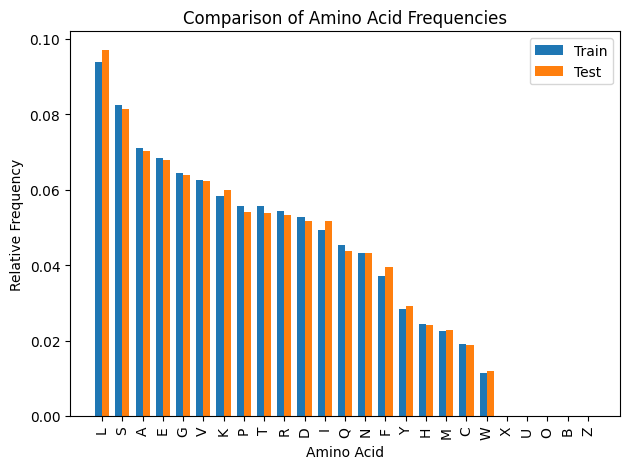

In [19]:
# Frequencies of amino acids in train sequences
train_freq = {
    'L': 7386109, 'S': 6493284, 'A': 5601393, 'E': 5388873, 'G': 5061691,
    'V': 4931367, 'K': 4594229, 'P': 4382337, 'T': 4378528, 'R': 4283020,
    'D': 4151113, 'I': 3879567, 'Q': 3563728, 'N': 3400751, 'F': 2930638,
    'Y': 2239153, 'H': 1914456, 'M': 1776672, 'C': 1504314, 'W': 888449,
    'X': 2771, 'U': 148, 'O': 4, 'B': 4, 'Z': 4
}

# Frequencies of amino acids in test sequences
test_freq = {
    'L': 6571441, 'S': 5512318, 'A': 4750271, 'E': 4588833, 'G': 4318376,
    'V': 4223179, 'K': 4060313, 'T': 3650414, 'P': 3648374, 'R': 3611308,
    'I': 3501751, 'D': 3501462, 'Q': 2950714, 'N': 2919742, 'F': 2667898,
    'Y': 1970413, 'H': 1628870, 'M': 1545971, 'C': 1264828, 'W': 798942,
    'X': 657, 'U': 218, 'Z': 45, 'B': 39
}

# Determine all unique amino acids
all_amino_acids = list(set(list(train_freq.keys()) + list(test_freq.keys())))

# Add zero frequencies for missing amino acids
for aa in all_amino_acids:
    if aa not in train_freq:
        train_freq[aa] = 0
    if aa not in test_freq:
        test_freq[aa] = 0

# Calculate relative frequencies by dividing by the total number of sequences
train_total = sum(train_freq.values())
test_total = sum(test_freq.values())

train_relative_freq = {aa: freq / train_total for aa, freq in train_freq.items()}
test_relative_freq = {aa: freq / test_total for aa, freq in test_freq.items()}

# Visualize the distributions using bar plots
labels = train_relative_freq.keys()
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_relative_freq.values(), width, label='Train')
rects2 = ax.bar(x + width/2, test_relative_freq.values(), width, label='Test')

ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Amino Acid')
ax.set_title('Comparison of Amino Acid Frequencies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import chi2_contingency
# Perform chi-square test
observed = np.array(list(train_relative_freq.values()))
expected = np.array(list(test_relative_freq.values()))

chi2, p_value, _, _ = chi2_contingency([observed, expected])

print("Chi-square test results:")
print("p-value:", p_value)

Chi-square test results:
p-value: 1.0


The chi-square test results indicate that there is no significant difference in the amino acid frequencies between the train and test sequences. The p-value of 1.0 suggests that the observed differences in frequencies can be attributed to chance, and there is no evidence to reject the null hypothesis of equal distributions.

In other words, based on the comparison of amino acid frequencies, there is no notable difference between the train and test sequences in terms of amino acid composition.

#### Biases and patterns

To identify biases or patterns in the frequencies of different amino acids, we can compare the relative frequencies of amino acids between the train and test sequences. One approach is to calculate the difference in relative frequencies and analyze which amino acids show the largest deviations.


In [22]:
# Define the list of amino acids
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Calculate the difference in relative frequencies
frequency_difference = {
    amino_acid: abs(train_relative_freq[amino_acid] - test_relative_freq[amino_acid])
    for amino_acid in amino_acids
}

# Sort the amino acids based on the difference in frequencies
sorted_amino_acids = sorted(frequency_difference.keys(), key=lambda x: frequency_difference[x], reverse=True)

# Print the amino acids with the largest deviations
num_top_amino_acids = 5  # Number of top amino acids to display
print(f"Top {num_top_amino_acids} amino acids with the largest deviations:")
for amino_acid in sorted_amino_acids[:num_top_amino_acids]:
    print(f"Amino Acid: {amino_acid}")
    print(f"Train Frequency: {train_relative_freq[amino_acid]:.4f}")
    print(f"Test Frequency: {test_relative_freq[amino_acid]:.4f}")
    print(f"Difference: {frequency_difference[amino_acid]:.4f}")
    print()

Top 5 amino acids with the largest deviations:
Amino Acid: L
Train Frequency: 0.0938
Test Frequency: 0.0971
Difference: 0.0033

Amino Acid: I
Train Frequency: 0.0493
Test Frequency: 0.0517
Difference: 0.0025

Amino Acid: F
Train Frequency: 0.0372
Test Frequency: 0.0394
Difference: 0.0022

Amino Acid: P
Train Frequency: 0.0556
Test Frequency: 0.0539
Difference: 0.0017

Amino Acid: T
Train Frequency: 0.0556
Test Frequency: 0.0539
Difference: 0.0017



To compare the observed frequencies of amino acids to the provided background distribution, we can calculate the expected frequencies based on a background distribution and perform a statistical test to assess the deviation.

In [23]:
# Observed frequencies of amino acids (based on previous calculations)
observed_frequencies = {
    'A': 0.0938,
    'Q': 0.0517,
    'L': 0.0971,
    'S': 0.0394,
    'R': 0.0556,
    'E': 0.0394,
    'K': 0.0556,
    'T': 0.0539,
    'N': 0.0517,
    'G': 0.0556,
    'M': 0.0372,
    'W': 0.0372,
    'D': 0.0556,
    'H': 0.0372,
    'F': 0.0394,
    'Y': 0.0372,
    'C': 0.0372,
    'I': 0.0556,
    'P': 0.0539,
    'V': 0.0556,
}

# Background distribution frequencies (based on https://www.ebi.ac.uk/uniprot/TrEMBLstats)
background_frequencies = {
    'A': 9.06,
    'Q': 3.79,
    'L': 9.87,
    'S': 6.78,
    'R': 5.84,
    'E': 6.24,
    'K': 4.92,
    'T': 5.54,
    'N': 3.79,
    'G': 7.29,
    'M': 2.33,
    'W': 1.30,
    'D': 5.47,
    'H': 2.21,
    'F': 3.89,
    'Y': 2.88,
    'C': 1.28,
    'I': 5.55,
    'P': 4.97,
    'V': 6.88,
}

# Calculate expected frequencies based on the background distribution
total_sequences = len(train_sequence_lengths) + len(train_sequence_lengths)
expected_frequencies = {
    amino_acid: background_frequencies[amino_acid] / 100 * total_sequences
    for amino_acid in observed_frequencies
}

# Perform statistical test to assess the deviation
chi2, p_value, _, _ = chi2_contingency([list(observed_frequencies.values()), list(expected_frequencies.values())])

print("Chi-square test results:")
print("p-value:", p_value)

Chi-square test results:
p-value: 1.0


In this code, the observed frequencies are compared to the expected frequencies based on the provided background distribution using the chi-square test. The resulting p-value of 1.0 indicates that there is no significant deviation between the observed frequencies of amino acids and the expected frequencies based on the provided background distribution. This suggests that the observed frequencies are consistent with the background distribution, and there are no notable biases or patterns in the composition of amino acids compared to the expected distribution.

A p-value of 1.0 suggests that the observed frequencies are likely due to random chance and not indicative of a significant difference from the expected distribution. Therefore, based on this analysis, it appears that the frequencies of amino acids in our sequences are in line with the background distribution.